In [1]:
import numpy as np
from qutip import *

In [100]:
# Pre-compute operators for the hamiltonian
sz1 = tensor(sigmaz(), qeye(2), qeye(2))
sx1 = tensor(sigmax(), qeye(2), qeye(2))

sz2 = tensor(qeye(2), sigmaz(), qeye(2))
sx2 = tensor(qeye(2), sigmax(), qeye(2))

sz3 = tensor(qeye(2), qeye(2), sigmaz())
sx3 = tensor(qeye(2), qeye(2), sigmax())


w = np.random.random(3)
display(w)
g = 1.0

H = w[0] * sz1 + w[1] * sz2 + w[2] * sz3 +\
        g * sx1 * sx2 + g * sx1 * sx3


sz_tot = sz1 + sz2 + sz3

sz_tot_sq = sz_tot * sz_tot

def evolve_H(psi0, t_init, t_final, nts=100):
    times = np.linspace(t_init, t_final, nts)
    return mesolve(H, psi0, times, [], [])


def evolve_pulse(psi0, theta):
    return (-(1j)*theta*(sx1 + sx2 + sx3)).expm() * psi0
    


array([0.37816977, 0.30153198, 0.52219246])

In [101]:
evals, evecs = sz_tot.eigenstates()
psi_running = evecs[0]

times = []
sz_vals = []
szsq_vals = []

tau = 4.0

sol = evolve_H(psi_running, 0, tau)
times.append(sol.times)
sz_vals.append([expect(sz_tot, psi) for psi in sol.states])
szsq_vals.append([expect(sz_tot_sq, psi) for psi in sol.states])
psi_running = sol.states[-1]

psi_running = evolve_pulse(psi_running, np.pi/2)


sol = evolve_H(psi_running, tau, 2*tau)
times.append(sol.times)
sz_vals.append([expect(sz_tot, psi) for psi in sol.states])
szsq_vals.append([expect(sz_tot_sq, psi) for psi in sol.states])
psi_running = sol.states[-1]

psi_running = evolve_pulse(psi_running, np.pi)


sol = evolve_H(psi_running, 2*tau, 3*tau)
times.append(sol.times)
sz_vals.append([expect(sz_tot, psi) for psi in sol.states])
szsq_vals.append([expect(sz_tot_sq, psi) for psi in sol.states])
psi_running = sol.states[-1]




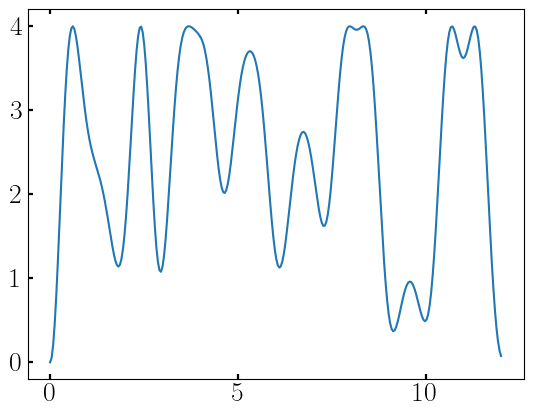

In [102]:
import matplotlib.pyplot as plt

times = np.array(times).flatten()
sz_vals = np.array(sz_vals).flatten()
szsq_vals = np.array(szsq_vals).flatten()
plt.plot(times, szsq_vals - (sz_vals * sz_vals))

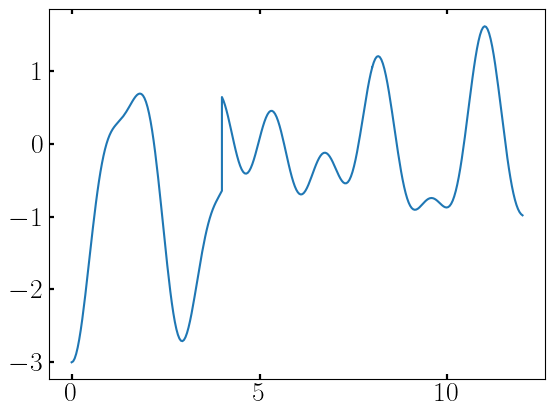

In [104]:
plt.plot(times, sz_vals)